TASK-1
CREDIT CARD FRAUD DETICTION.

IMPORT ALL REQUIRED PACKAGES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import RandomOverSampler


LOAD THE DATA SET

In [3]:
credit=pd.read_csv('creditcard.csv')

In [4]:
credit.shape

(284807, 31)

In [5]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
credit.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
credit.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


CLEANING THE DATA

In [8]:
credit.drop_duplicates(inplace=True)

In [9]:
credit.fillna('NaN', inplace=True)

In [11]:
mean_amount = credit['Amount'].mean()
std_amount = credit['Amount'].std()
credit= credit[(credit['Amount'] >= mean_amount - 3 * std_amount) & (credit['Amount'] <= mean_amount + 3 * std_amount)]

In [12]:
credit.shape

(279663, 31)

In [14]:
credit.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,279663.000000,279663.000000,279663.000000,279663.000000,279663.000000,279663.000000,279663.000000,279663.000000,279663.000000,279663.000000,...,279663.000000,279663.000000,279663.000000,279663.000000,279663.000000,279663.000000,279663.000000,279663.000000,279663.000000,279663.000000
mean,94833.041017,0.044777,0.067359,0.031874,-0.016499,0.043200,-0.023251,-0.041537,0.010739,0.002286,...,-0.007856,0.005525,0.007141,-0.000505,0.002133,-0.000124,0.001380,-0.000404,67.046900,0.001652
std,47496.868122,1.870868,1.433962,1.470252,1.400066,1.251487,1.279574,1.065921,1.162213,1.091137,...,0.703869,0.717122,0.488742,0.604706,0.513429,0.480038,0.372603,0.294204,116.081759,0.040611
min,0.000000,-46.855047,-47.429676,-33.680984,-5.683171,-23.669726,-23.496714,-43.557242,-73.216718,-13.434066,...,-34.830382,-8.887017,-36.666000,-2.836627,-7.495741,-2.068561,-22.565679,-11.710896,0.000000,0.000000
25%,54255.500000,-0.893621,-0.567833,-0.852800,-0.856539,-0.663404,-0.773937,-0.560261,-0.202624,-0.637477,...,-0.229490,-0.537979,-0.157067,-0.355063,-0.315324,-0.326057,-0.068432,-0.052924,5.380000,0.000000
50%,84734.000000,0.044582,0.078787,0.199221,-0.031331,-0.039092,-0.284117,0.029809,0.025623,-0.049515,...,-0.032760,0.010350,-0.009581,0.040431,0.017942,-0.051392,0.002533,0.010703,20.980000,0.000000
75%,139324.500000,1.326063,0.810999,1.039639,0.725511,0.622146,0.373920,0.550674,0.330383,0.596351,...,0.178800,0.531391,0.147316,0.438486,0.351440,0.238837,0.091378,0.075040,73.715000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,13.129143,34.099309,16.614054,15.661716,20.007208,15.594995,...,27.202839,10.503090,22.083545,4.022866,7.519589,3.517346,8.708972,22.620072,839.500000,1.000000


DATA PREPROCESSING

In [16]:
scaler = StandardScaler()
credit['scaled_amount'] = scaler.fit_transform(credit['Amount'].values.reshape(-1, 1))
credit['scaled_time'] = scaler.fit_transform(credit['Time'].values.reshape(-1, 1))


In [17]:
credit.drop(['Time', 'Amount'], axis=1, inplace=True)

In [18]:
X = credit.drop('Class', axis=1)
y = credit['Class']

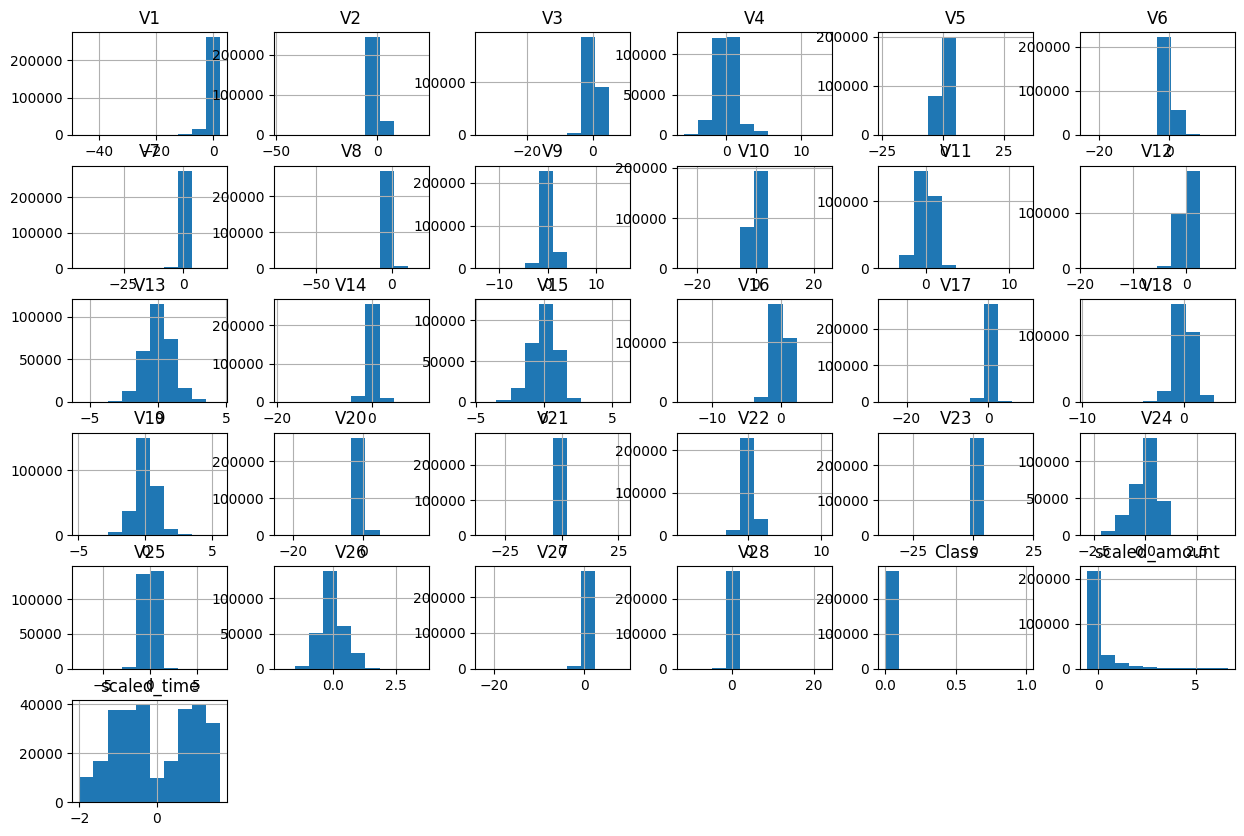

In [27]:
credit.hist(figsize=(15, 10))
plt.show()

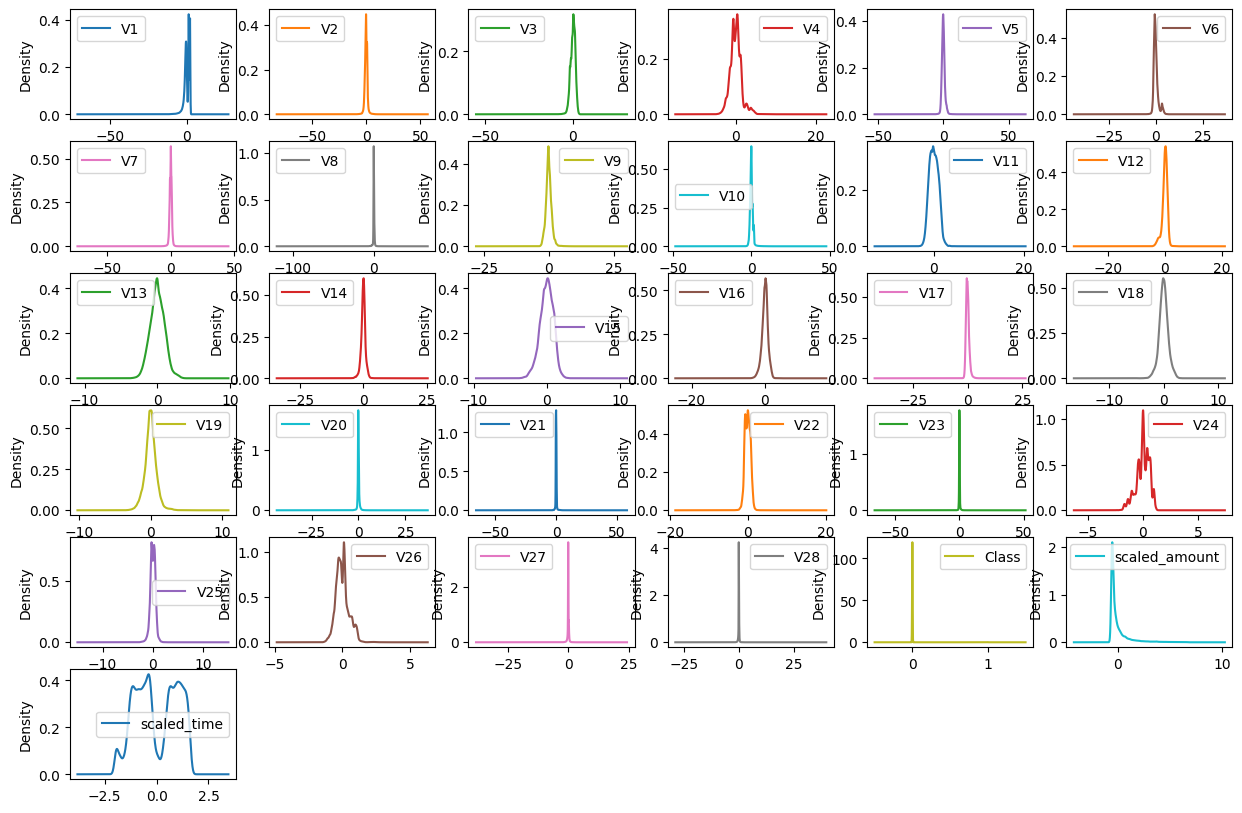

In [32]:
import math
n_features = len(credit.columns)
layout_rows = math.ceil(math.sqrt(n_features))
layout_cols = math.ceil(n_features / layout_rows)
credit.plot(kind='density', subplots=True, layout=(layout_rows, layout_cols), sharex=False, figsize=(15, 10))
plt.show()


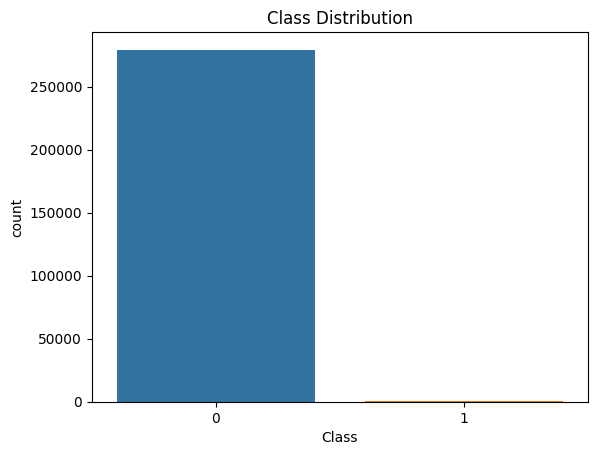

In [34]:
sns.countplot(data=credit, x='Class')
plt.title('Class Distribution')
plt.show()


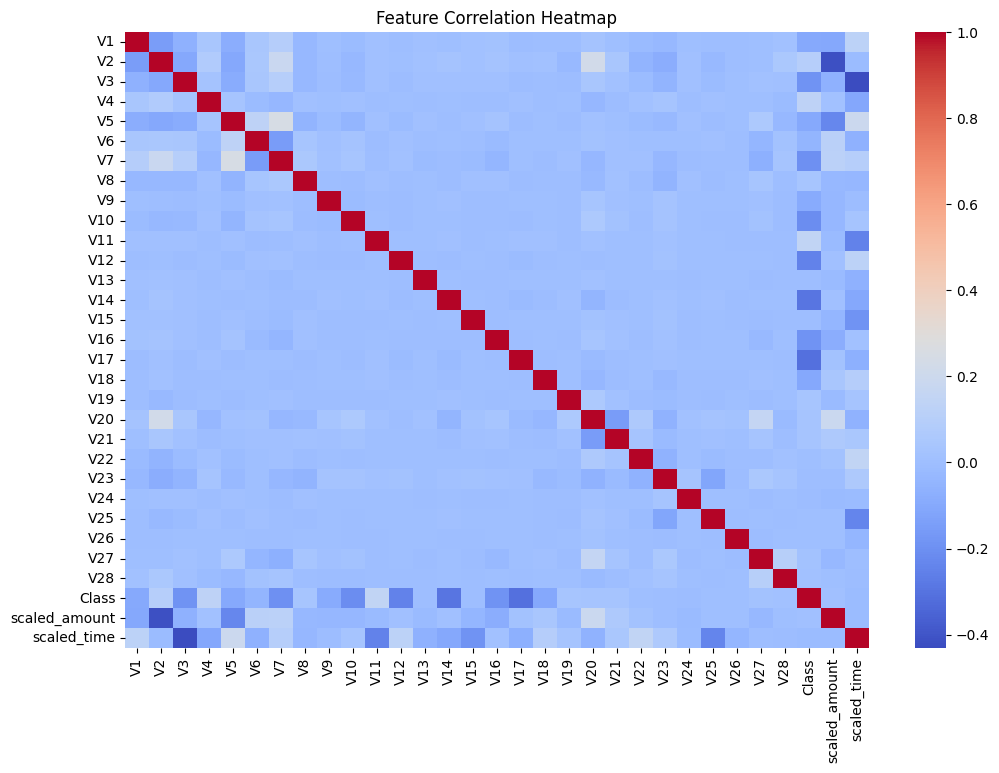

In [35]:
correlation_matrix = credit.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


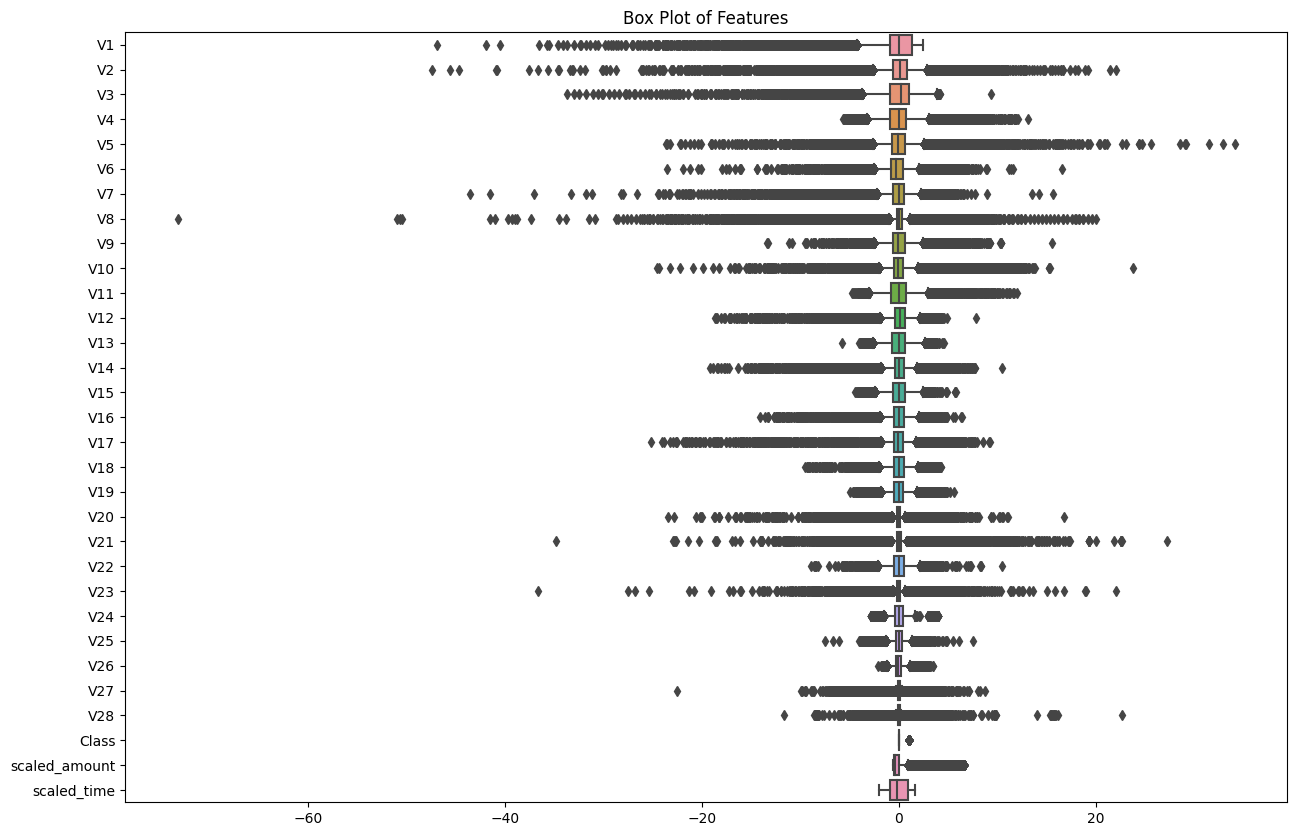

In [36]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=credit, orient="h")
plt.title('Box Plot of Features')
plt.show()


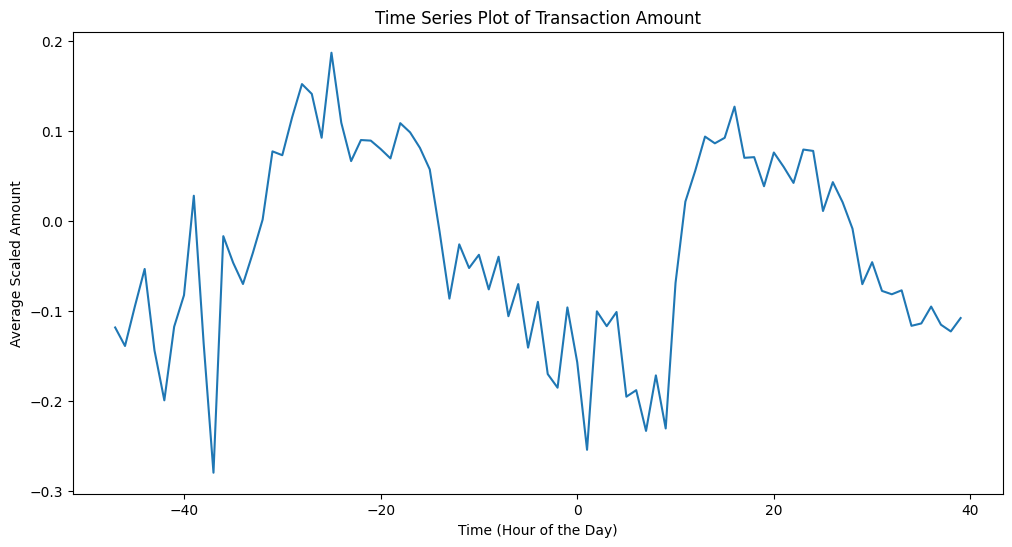

In [52]:
credit['TransactionHour'] = credit['scaled_time'].apply(lambda x: int(x * 24))
df_agg = credit.groupby('TransactionHour')['scaled_amount'].mean().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(df_agg['TransactionHour'], df_agg['scaled_amount'],  linestyle='-')
plt.xlabel('Time (Hour of the Day)')
plt.ylabel('Average Scaled Amount')
plt.title('Time Series Plot of Transaction Amount')
plt.show()


TRAINING THE DATA SET

In [56]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
oversampler = RandomOverSampler(sampling_strategy=0.5)
X_resampled, y_resampled = oversampler.fit_resample(X_train, y_train)


In [62]:
X_train

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,scaled_amount,scaled_time
163541,1.623943,-1.540882,-0.656499,-0.593409,-0.959712,0.384717,-0.796281,0.280122,2.041798,-0.485819,...,-0.137537,-0.616667,0.187526,0.362959,-0.608840,0.358074,-0.069261,-0.022963,1.145342,0.446050
170646,1.895969,-0.616843,-0.022551,0.449442,-0.888507,0.017985,-0.941105,0.216160,1.162803,0.198313,...,0.061945,0.220809,0.249625,-0.342482,-0.553572,0.167490,-0.003963,-0.044081,-0.295024,0.535972
138207,-0.600161,0.595640,1.930531,-1.419350,0.024243,-0.375154,0.607485,0.040601,-0.047772,-0.373090,...,-0.051053,0.050847,-0.069873,0.240435,-0.523488,0.692469,0.104575,-0.061971,-0.565696,-0.258818
86876,-0.322197,1.185322,0.684438,0.952378,-0.080772,-0.374179,0.298855,0.389962,-0.723910,-0.416985,...,0.204573,0.546644,-0.021801,0.087982,-0.201052,-0.298782,-0.027241,-0.021122,-0.474209,-0.703185
280239,-1.145713,1.620573,-0.824762,-0.944795,0.687170,-0.258499,0.616107,0.026901,0.965182,0.800669,...,-0.098056,0.182557,-0.063908,0.241115,-0.587876,0.201679,-0.942345,-0.727574,-0.556823,1.570063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122246,-1.332732,0.410898,1.936138,-1.108170,-0.567457,0.785767,-0.431065,1.072881,0.407336,-1.153409,...,-0.042349,-0.033558,0.022928,-0.251989,-0.261319,0.844046,0.158226,0.057303,-0.322850,-0.386153
264007,-1.280425,1.811851,-2.606247,-1.427074,2.335357,4.245527,-2.247345,-3.930580,-0.836196,-1.469063,...,-2.100757,2.000644,0.410821,0.697022,-0.871031,-0.230056,0.333279,0.325598,-0.524260,1.397757
134450,-2.768762,2.648111,-0.123209,0.614897,-0.585905,0.697033,-1.491990,-3.018300,-0.583236,0.348029,...,4.121518,-0.627965,0.438815,-0.032364,-0.210887,-0.308463,-0.016889,0.092863,-0.446297,-0.295179
149585,0.105150,0.987684,-0.381922,-0.502763,1.106190,-0.341403,0.697141,0.031874,1.150074,-1.005938,...,-0.467257,-1.044481,0.082094,0.158373,-0.468474,0.076949,0.183188,0.063410,-0.530290,-0.069711


In [63]:
y_train

163541    0
170646    0
138207    0
86876     0
280239    0
         ..
122246    0
264007    0
134450    0
149585    0
124340    0
Name: Class, Length: 223730, dtype: int64

In [64]:
X_test

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,scaled_amount,scaled_time
255617,1.928563,-0.574472,-1.371483,0.008767,0.008075,-0.127348,-0.163768,0.059824,1.065944,-0.028770,...,-0.128597,-0.379140,0.161626,0.326194,-0.095922,-0.119884,-0.053786,-0.056356,-0.060706,1.315393
270423,2.043364,-0.164779,-1.896153,0.362870,0.470839,-0.087335,-0.195402,0.074222,0.819840,-0.261514,...,-0.014502,0.132359,0.004739,0.028698,0.118007,0.628558,-0.065534,-0.053539,-0.521762,1.457761
242396,0.773546,-2.178523,-1.255713,1.484754,-0.651175,0.702903,0.160646,0.062422,0.629716,0.106788,...,0.606109,0.421907,-0.444790,0.203050,-0.262172,-0.647212,-0.070199,0.068483,4.780717,1.192606
159005,2.085554,0.004722,-1.369152,0.333008,0.040152,-1.284499,0.259114,-0.400877,0.597096,0.013985,...,0.235778,0.854331,-0.018614,-0.071264,0.290353,-0.101648,-0.019250,-0.060096,-0.568970,0.363329
259702,-0.483657,1.664506,-1.517936,-0.814406,1.668152,-0.948075,0.976577,0.184050,-0.563664,-2.401187,...,0.157982,0.386856,-0.445362,-0.159443,0.590688,-0.198618,-0.075720,0.007533,-0.492213,1.355923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62102,1.139860,0.089757,0.509154,1.488815,-0.466957,-0.416270,-0.041768,0.061147,0.532659,-0.073942,...,-0.100132,-0.138056,-0.001510,0.360556,0.560203,-0.326617,0.028959,0.015519,-0.503326,-0.941201
67857,-0.812255,0.925741,1.323425,3.100991,0.126619,-0.234583,-0.140519,0.508667,-1.639854,0.496528,...,0.294820,0.589362,-0.015695,0.419071,-0.313779,0.262187,-0.011807,-0.079641,-0.479550,-0.886524
23252,-0.594980,1.328864,1.373668,0.095208,-0.088716,-1.140843,0.758915,-0.211941,-0.401468,-0.315690,...,-0.196749,-0.565936,0.033078,0.680057,-0.200129,0.023050,-0.025002,0.103575,-0.554411,-1.309016
13630,-0.378411,1.198145,1.458595,0.148454,0.166150,-0.612831,0.512038,-0.006528,0.629885,-0.712208,...,-0.363503,-0.762749,-0.019297,0.217415,-0.213901,0.015994,0.215642,0.081583,-0.562164,-1.487954


In [65]:
y_test

255617    0
270423    0
242396    0
159005    0
259702    0
         ..
62102     0
67857     0
23252     0
13630     0
7544      0
Name: Class, Length: 55933, dtype: int64

In [69]:
rf_classifier = RandomForestClassifier(n_estimators=10, random_state=42)
rf_classifier.fit(X_resampled, y_resampled)
y_pred = rf_classifier.predict(X_test)


EVALUATING THE MODEL

In [70]:

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))


Confusion Matrix:
[[55846     3]
 [   25    59]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     55849
           1       0.95      0.70      0.81        84

    accuracy                           1.00     55933
   macro avg       0.98      0.85      0.90     55933
weighted avg       1.00      1.00      1.00     55933


Accuracy Score:
0.9994994010691363


VISUALIZING THE MODEL

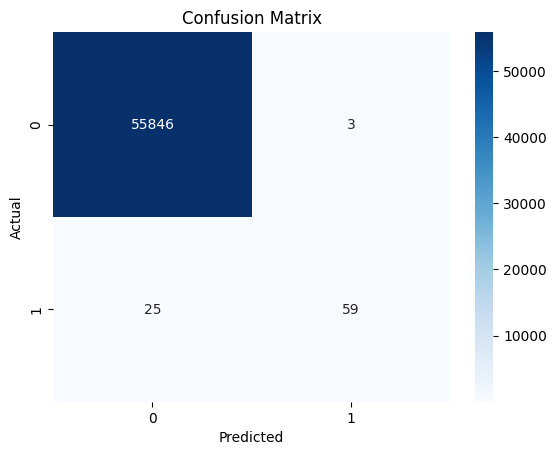

In [71]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


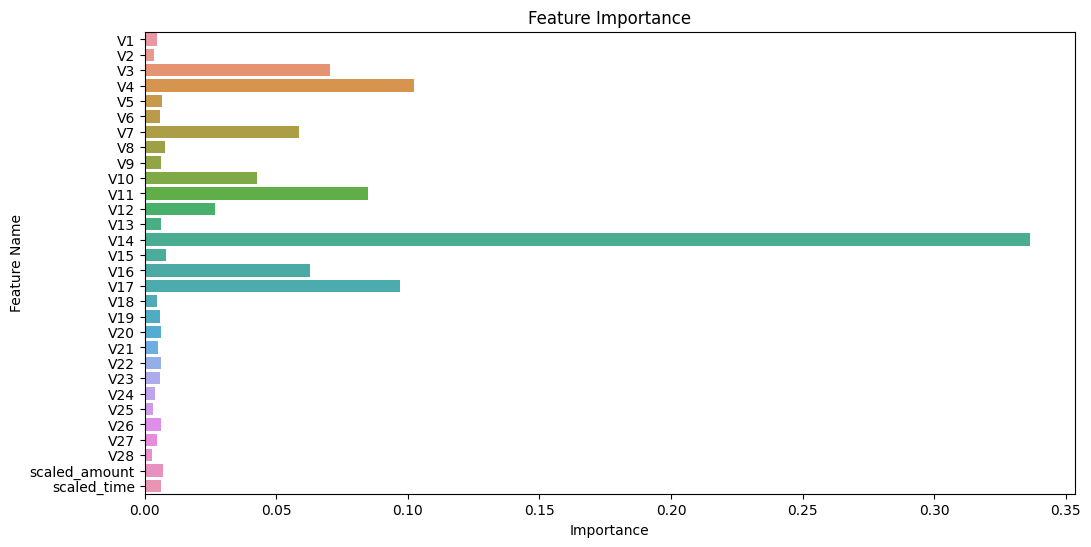

In [72]:
feature_importance = rf_classifier.feature_importances_
feature_names = X.columns
plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importance, y=feature_names)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature Name')
plt.show()
